# Proyecto 1
---

##### Maestría en Data Science, Ciencia de Datos en Python,Ciclo 1, 2023
##### Sergio Josué Castillo Custodio, Carnet: 23000331

---
Este proyecto consiste en crear modelos predictivos de regresión lineal uni-variable. A continuación se desarrolla el mismo.


### Parte 1: Librerías y Clases

Se importan las librerías a utilizar y se crea una clase que contenga todos los atributos y métodos para los modelos de regresión lineal uni-variable a analizar.

In [1]:
#Importando librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Creando Clase RegresionLineal

# Esta clase posee varios atributos, en los que se almacenan datos relevantes para un modelo de regresión:
#   self.xtrain almacena el dataset de entrenamiento de la variable independiente.
#   self.ytrain almacena el dataset de entrenamiento de la variable dependiente.
#   self.xtest almacena el dataset de validación de la variable independiente.
#   self.ytest almacena el dataset de validación de la variable dependiente.
# Estos atributos se asignan al crear una instancia de esta clase

# Asimismo, la clase crea y asigna valores a otros atributos de la misma a través de sus métodos:
#   self.modelo almacena los coeficientes estimados con el modelo manual
#   self.resultados almacena los resultados de todas las iteraciones del algoritmo del modelo manual
#   self.modelo_scikit almacena los coeficiente estimados a través de SciKit Learn
#   self.resultados_scikit almacena los resultados del modelo estimado a través de SciKit Learn
#   self.predicciones almacena los resultados de las predicciones realizadas al probar los modelos con cualquier dataset
#   self.resultados_testing almacena los resultados de las predicciones realizadas al probar los modelos con el dataset de validación
#   self.resultados_testing_rmsmm almacena el error calculado con RMS para el modelo manual al probarlo con el dataset de validación
#   self.resultados_testing_rmsms almacena el error calculado con RMS para el modelo de SciKit Learn al probarl con el dataset de validación

# A continuación se desarrollan los métodos de la clase

class RegresionLineal:
    def __init__(self,xtrain,ytrain,xtest,ytest):
        self.xtrain=xtrain
        self.ytrain=ytrain
        self.xtest=xtest
        self.ytest=ytest

    def regresion (self,epochs,imprimir_error_cada,lrate):
        # Crea un modelo de regresión uni-variable de forma manual siguiendo el algoritmo de aprendizaje

        # Asignando parámetros del dataset de entrenamiento
        x=self.x
        y=self.y

        # Inicializando diccionario de resultados, en el cual se almacenan los datos de cada iteración
        resultadosd={}

        # Inicializando parámetros B0 y B1
        #   Los valores iniciales de los coeficientes B0 y B1 se determinan por medio de las ecuaciones
        #   para una recta, la cual está determinada (de forma estimada) entre los puntos máximos y mínimos
        #   de 'x' y 'y' en el dataset de entrenamiento, esto es coordenadas (x_min, y_min) y (x_max, y_max).
        #   De esta forma se asignan valores más realistas para B0 y B1 al inicio de las iteraciones.
        B1=(y.max()-y.min())/(x.max()-x.min())
        B0=y.max()-(B1*(x.max()))

        # Convirtiendo x en una matriz de n filas y 2 columnas para fácilitar operaciones vectorizadas
        unos=np.ones_like(x).reshape(-1,1)
        x=np.reshape(x,(-1,1))
        x=np.hstack([x,unos])

        # Matriz transversa de y
        y=np.reshape(y,(-1,1))

        # Inicializando coeficientes en un array de 2 filas, 1 columna para faciliar operaciones vectorizadas
        coeficientes=np.array([B1,B0]).reshape(-1,1)

        # Iterando para el total de epochs (iteraciones, definidas por el usuario)
        for i in range(epochs):
            yE=np.dot(x,coeficientes)
            error=np.mean(np.power((y-yE),2))

            # Imprimiendo error, cada cierto número de iteraciones (definido por el usuario)
            if ((i%imprimir_error_cada)==0):
                print(f'El error en la iteración {i} es: {error}')

            # Almacenando resultados en diccionario
            resultadosd[i]=B1,B0,error

            # Preparando siguiente iteración, recalculando valores de coeficientes a través de gradientes
            # y learning rate.
            delta_betas=(np.dot((yE-y).reshape(1,-1),x))/(y.size)
            B0=B0-lrate*(delta_betas[0,1])
            B1=B1-lrate*(delta_betas[0,0])
            coeficientes=np.array([B1,B0]).reshape(-1,1)

        # Almacenando resultados en atributos de clase

        # Almacenando coeficientes finales para el modelo
        self.modelo=np.array([B1,B0])

        # Almacenando resultados de todas las iteraciones en un DataFrame, a partir del diccionario creado
        self.resultados=pd.DataFrame(resultadosd).T
        self.resultados.columns=['B1','B0','Error']

        return(self.modelo)
    
    def regresion_scikit(self):
        # Crea un modelo de regresión uni-variable de por medio de la libería SciKit Learn

        # Asignando parámetros del dataset de entrenamiento
        x=self.x
        y=self.y

        # Calculando modelo a través de funciones de SciKit Learn
        self.resultados_scikit = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1,1))

        # Almacenando coeficientes del modelo de SciKit Learn en un atributo de la clase
        self.modelo_scikit=np.array([float(self.resultados_scikit.coef_),float(self.resultados_scikit.intercept_)])
        
        return (self.modelo_scikit)
    
    # Función para gráfica de error
    def error_modelo(self):
        # Grafica la evolución del valor del error para cada iteración del modelo manual de regresión lineal

        # Verifica si existe un modelo de regresión para la instancia
        if hasattr(self,'resultados'):
            
            # Si existe el modelo de regresión, se definen atributos del gráfico:
            
            # Definiendo estilo y tamaño del gráfico
            sns.set_theme(style="darkgrid")
            sns.set(rc = {'figure.figsize':(8,8)})

            # Se define el tipo de gráfica (lineplot) y los datos a utilizarse, que se extraen del 
            # DataFrame de resultados del modelo de regresión
            sns.lineplot(x=self.resultados.index,y=self.resultados['Error'],data=self.resultados)
            
            # Se definen atributos de la gráfica (título, etiquetas de ejes, límites de ejes)
            titulo='Evolución estimación de error: '+str((self.resultados.index.max())+1)+' iteraciones'
            plt.title(titulo,fontsize=10)
            plt.xlabel('Iteraciones',fontsize=8)
            plt.ylabel('Error', fontsize=8)
            plt.xlim(-0.05*((self.resultados.index.max())),1.10*(self.resultados.index.max()))
            plt.ylim(-0.05*(self.resultados['Error'].max()),1.10*(self.resultados['Error'].max()))
        
        #Si no existe un modelo de regresión para la instancia:
        else:
            print('El objeto aún no posee un modelo. Ejecute el método ".regresion" antes de poder evaluar esta función.')

    def evolucion(self,n):
        # Función para graficar evolución del modelo a lo largo de n iteraciones (epochs), definidas por el
        # usuario. Se gráfica el modelo (en función de sus coeficientes) cada n iteraciones, dato definido
        # por el usuario también.

        # Verifica si existe un modelo de regresión para la instancia
        if hasattr(self,'resultados'):

            # Si existe el modelo de regresión, se definen atributos del gráfico:

            # Se crea gráfica inicial

            # Definiendo estilo y tamaño del gráfico
            sns.set_theme(style="darkgrid")
            sns.set(rc = {'figure.figsize':(10,10)})

            # Se generan números de forma automática para la variable x, contenidos dentro del
            # rango (valor mínimo y valor máximo) de la variable dependiente considerada
            xarr=np.linspace(0,x.max(),self.resultados.index.max()+1)

            # Se define el tipo de gráfica (lineplot) y los datos a utilizarse, para el eje x los
            # valores generados en la línea anterior y para el eje y los que se extraen del 
            # DataFrame de resultados del modelo de regresión
            sns.lineplot(x=xarr,y=((self.resultados.iloc[0,0])*xarr)+self.resultados.iloc[i,1],data=self.resultados,label=('y='+str(self.resultados.iloc[0,0])+'x+'+str(self.resultados.iloc[0,1])))

            # Se definen atributos de la gráfica (título y etiquetas de ejes)
            titulo='Evolución modelo: Iteración: '+str(i)
            plt.xlabel('x',fontsize=8)
            plt.ylabel('y', fontsize=8)
            plt.title(titulo,fontsize=10)

            # Se itera a través de los resultados de todas las iteraciones, y cada n iteraciones, se
            # gráfica el estado del modelo:
            for i in range(0,self.resultados.index.max(),n):

                # Se define el tipo de gráfica (lineplot) y los datos a utilizarse, para el eje x los
                # valores generados en la línea anterior y para el eje y los que se extraen del 
                # DataFrame de resultados del modelo de regresión
                sns.lineplot(x=xarr,y=((self.resultados.iloc[i,0])*xarr)+self.resultados.iloc[i,1],data=self.resultados,label=('y='+str(self.resultados.iloc[i,0])+'x+'+str(self.resultados.iloc[i,1])))

            #Se despliega gráfica    
            plt.show()
        
        #Si no existe un modelo de regresión para la instancia:
        else:
            print('El objeto aún no posee un modelo. Ejecute el método ".regresion" antes de poder evaluar esta función.')
    
    def prediccion (self, xp):
        # Función para predecir los valores de y, a través de los modelos calculados

        # Verifica si existe un modelo de regresión para la instancia
        if (hasattr(self,'resultados') and hasattr(self,'resultados_scikit')):

            # Si existe el modelo de regresión, se definen atributos del gráfico:

            # Convirtiendo xp en una matriz de n filas y 2 columnas
            unos=np.ones_like(xp).reshape(-1,1)
            xp=np.reshape(xp,(-1,1))
            xp=np.hstack([xp,unos])

            # Predicción con el modelo entrenado manualmente
            ymm=np.dot(xp,self.modelo.reshape(-1,1))

            # Predicción con el modelo de Scikit Learn
            yms=np.dot(xp,self.modelo_scikit.reshape(-1,1))

            # Se almacenan los resultados de las predicciones de ambos modelos en una matriz de n filas
            # y dos columnas para poder calcular la media de cada resultado de ambos modelos
            ym=np.hstack([ymm,yms])

            #Promedio de ambas predicción
            ymedia=np.mean(ym,axis=1).reshape(-1,1)

            #Se almacenan todos los resultados en un array de NumPy y posteriormente en un DataFrame de Pandas
            ym=np.concatenate((ymm,yms,ymedia),axis=1)
            self.predicciones=pd.DataFrame(ym,columns=['y, Modelo Manual','y, Modelo SciKit','y, Promedio'])
            
            return (self.predicciones)
        
        #Si no existe un modelo de regresión para la instancia:
        else:
            print('El objeto aún no posee ambos modelos. Ejecute los médotos ".regresion" y ".regresion_scikit" antes de poder evaluar esta función.')
    
    def testing(self):
        # Función para probar los modelos calculados

        # Verifica si existe un modelo de regresión para la instancia
        if (hasattr(self,'resultados') and hasattr(self,'resultados_scikit')):

            # Si existe el modelo de regresión, se definen atributos del gráfico:

            # Se almacenan el dataset de validación (testing)
            xt=self.xtest
            yt=self.ytest

            #Convirtiendo xt en una matriz de n filas y 2 columnas
            unos=np.ones_like(xt).reshape(-1,1)
            xt=np.reshape(xt,(-1,1))
            xt=np.hstack([xt,unos])

            #Predicción con el modelo entrenado manualmente
            ytmm=np.dot(xt,self.modelo.reshape(-1,1))

            #Predicción con el modelo de Scikit Learn
            ytms=np.dot(xt,self.modelo_scikit.reshape(-1,1))

            #Calculando errores respecto a y real para cada modelo (Yreal-Yestimada)
            errormm=yt-ytmm
            errorms=yt-ytms

            #Calculando error de cada módelo por medio de RMS:
            rmsmm=(np.mean(np.power((errormm,2))))/2
            rmsms=(np.mean(np.power((errorms,2))))/2

            #Graficando datos del dataset de entrenamiento y modelos
            plt.scatter(xt,yt,label='Dataset', color='blue')
            plt.plot(xt,ytmm, label='ytmm=B1*x+B0; Error: '+str(rmsrmm), color='green')
            plt.plot(xt,ytms, label='ytms=B1*x+B0; Error: '+str(rmsms), color='red')
            plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper right')
            plt.title('Modelos calculados comparados con Dataset de validación', fontsize=10)
            plt.xlabel('x',fontsize=8)
            plt.ylabel('y',fontsize=8)
            plt.show()

            #Graficando errores:
            plt.plot(xt,errormm, label='Error modelo calculado manualmente', color='blue')
            plt.plot(xt,errorms, label='Error modelo SciKit Learn', color='red')
            plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper right')
            plt.title ('Error de cada modelo respecto a dataset de validación', fontsize=10)
            plt.xlabel('x', fontsize=8)
            plt.ylabel('Error (y real - y estimada)', fontsize=8)
            plt.show()

            #Almacenando resultados en un DataFrame
            yts=np.concatenate((yt,ytmm,errormm,ytms,errorms),axis=1)
            self.resultados_testing=pd.DataFrame(yts,columns=['y Validación','y Modelo Manual','Error Modelo Manual','y Modelo SciKit','Error Modelo SciKit'])
            self.restulados_testing_rmsmm=rmsmm
            self.resultados_testing_rmsms=rmsms
            
            return(self.resultados_testing,self.resultados_testing_rmsmm,self.resultados_testing_rmsms)
        
        #Si no existe un modelo de regresión para la instancia:
        else:
            print('El objeto aún no posee ambos modelos. Ejecute los médotos ".regresion" y ".regresion_scikit" antes de poder evaluar esta función.')

### Parte 2: Cargando y preparando Dataset

Se carga el dataset, almacenado en la computadora local en formato binario de NumPy. Una copía del mismo se encuentra en el repositorio de GitHub. Posteriormente, se analiza y prepara el dataset para su análisis. El análisis consiste en la búsqueda y tratamiento de valores NaN y la conversión del formato y estructura del dataset a uno que facilite el análisis.

In [3]:
# Se carga el dataset
dataset=np.load('/Users/sergiocastillo/Documents/Academics/Master/Data Science/Courseware/1 Ciencia de Datos en Python/Proyectos/proyecto1/cdpython_proyecto1/proyecto_training_data.npy')

# Se copía el dataset a un DataFrame
dataset_pd=pd.DataFrame(dataset,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

# Se ejecutara dataset_pd.describe() para verificar si en alguna de las columnas del dataset existen Nan
dataset_pd.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [7]:
# Como se puede observar en la tabla resultante de describe() para la variable LotFrontage, existen
# valores Nan, pues esta variable tiene un conteo menor a las demás y tampoco coincide con el total
# de observaciones (1460)

# Se calculará la mediana para cada variable, y esta se almacenará en un array de NumPy:
median_dataset=np.array(dataset_pd.median(axis=0,skipna=True))

# Los valores Nan en cada variable se reemplazaran con la mediana correspondiente a la misma (que esta
# almacenada en el array obtenido en la línea anterior). Los valores NaN solamente se encuentran en serie
# correspondiente a la variable LotFrontage. Se reemplaza con el valor de la mediana correspondiente a
# esta variable del array de medianas (posición 5). El dataset con los valores NaN eliminados se guarda en
# un nuevo array de NumPy.
dataset_fix=np.where(np.isnan(dataset),median_dataset[5],dataset)

# El dataset corregido para eliminar los valores NaN se copía a un DataFrame
dataset_pd_fix=pd.DataFrame(dataset_fix,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

# Se obtiene la información del DataFrame recién creado para validar que los NaN han sido corregidos para
# la variable LotFrontage. Se puede observar que esta variable ya cuenta con un total de 1460 datos, que
# corresponde al total de observaciones del dataset.
dataset_pd_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [5]:
# Se hace el slicing del dataset

# Slicing dataset
dataset_np_train=dataset_fix[:1168,:]
dataset_np_test=dataset_fix[1168:,:]

# Los datasets de entretamiento (train) y validación (test) separados se copían a DataFrames
dataset_pd_train=pd.DataFrame(dataset_np_train,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dataset_pd_test=pd.DataFrame(dataset_np_test,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

### Parte 3: Análisis exploratorio

Se completa el análisis exploratorio del dataset para conocer parámetros estadísticos del dataset y la relación entre variables para poder tomar decisiones para el análisis de regresión lineal.

In [6]:
# Se calculan las parámetros estadísticos del dataset solicitadas a partir del DataFrame que
# contiene los datos corregidos para eliminar los Nan (dataset_pd_fix)

# Parámetros estadísticos
# Creando un dataframe para almacenar los resultados
stats=pd.DataFrame({'Media':np.mean(dataset_fix,axis=0),
               'Valor máximo':np.max(dataset_fix,axis=0),
               'Valor mínimo':np.min(dataset_fix,axis=0),
               'Rango (peak to peak)':np.ptp(dataset_fix,axis=0),
               'Desviación estándar':np.std(dataset_fix,axis=0)},
               index=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
stats

,Media,Valor máximo,Valor mínimo,Rango (peak to peak),Desviación estándar
SalePrice,180921.195890,755000.0,34900.0,720100.0,79415.291886
OverallQual,6.099315,10.0,1.0,9.0,1.382523
1stFlrSF,1162.626712,4692.0,334.0,4358.0,386.455322
TotRmsAbvGrd,6.517808,14.0,2.0,12.0,1.624837
YearBuilt,1971.267808,2010.0,1872.0,138.0,30.192559
LotFrontage,69.863699,313.0,21.0,292.0,22.020132


#### Parte 3.1: Histogramas

Se despligan gráficas de histograma para cada variable utilizando Seaborn.

Histograma: Precio de Venta (SalePrice)


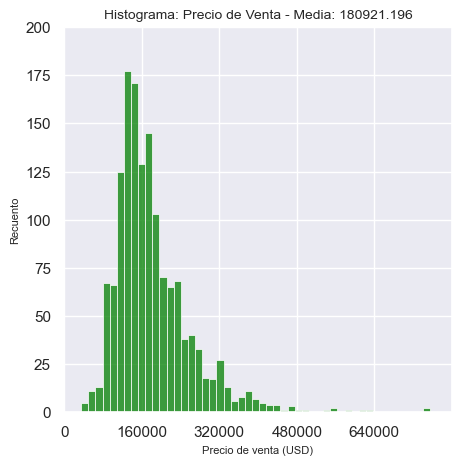

In [10]:
# Histograma de variable SalePrice, Precio de Venta

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['SalePrice'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Precio de Venta - Media: '+str(round((stats.loc['SalePrice']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Precio de venta (USD)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(0,800000)
plt.xticks(np.arange(0,800000,160000))
plt.ylim(0,200)
print('Histograma: Precio de Venta (SalePrice)')

Histograma: Calidad General (OverallQual)


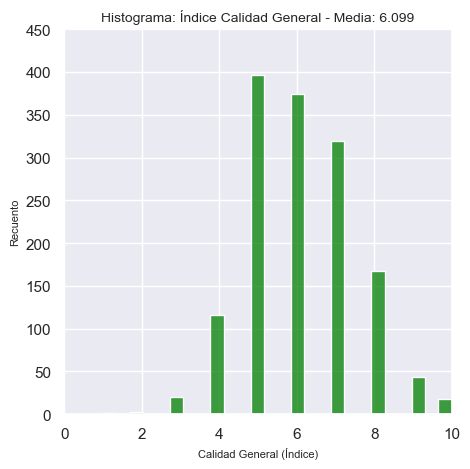

In [11]:
# Histograma de variable OverallQual, Calidad General

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['OverallQual'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Índice Calidad General - Media: '+str(round((stats.loc['OverallQual']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Calidad General (Índice)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(0,10)
plt.ylim(0,450)
print('Histograma: Calidad General (OverallQual)')

Histograma: Superficie Primer Piso (ft2) (1stFlrSF)


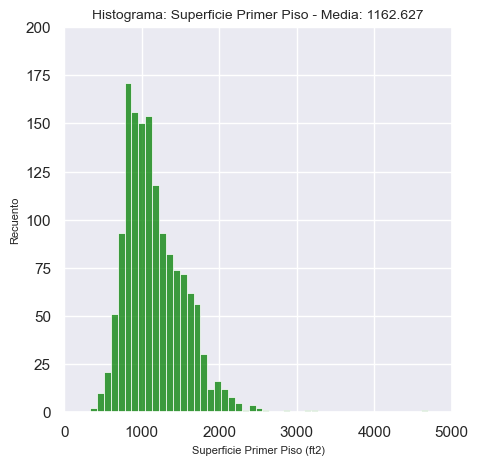

In [12]:
# Histograma de variable 1stFlrSF, Superficie Primer Piso

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['1stFlrSF'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Superficie Primer Piso - Media: '+str(round((stats.loc['1stFlrSF']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Superficie Primer Piso (ft2)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(0,5000)
plt.ylim(0,200)
print('Histograma: Superficie Primer Piso (ft2) (1stFlrSF)')

Histograma: Total Habitaciones sobre la Nota (adimensional) (TotRmsAbvGrd)


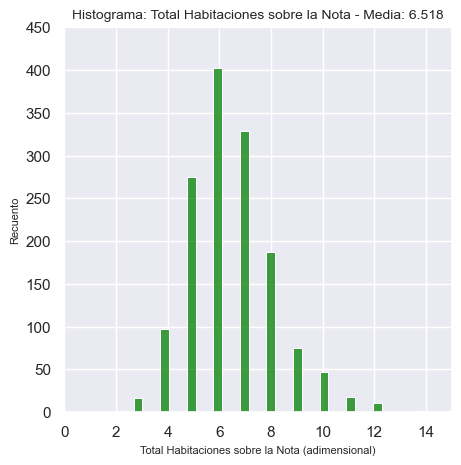

In [13]:
# Histograma de variable TotRmsAbvGrd, Total Habitaciones sobre la Nota

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['TotRmsAbvGrd'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Total Habitaciones sobre la Nota - Media: '+str(round((stats.loc['TotRmsAbvGrd']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Total Habitaciones sobre la Nota (adimensional)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(0,15)
plt.ylim(0,450)
print('Histograma: Total Habitaciones sobre la Nota (adimensional) (TotRmsAbvGrd)')

Histograma: Año de construcción (año) (YearBuilt)


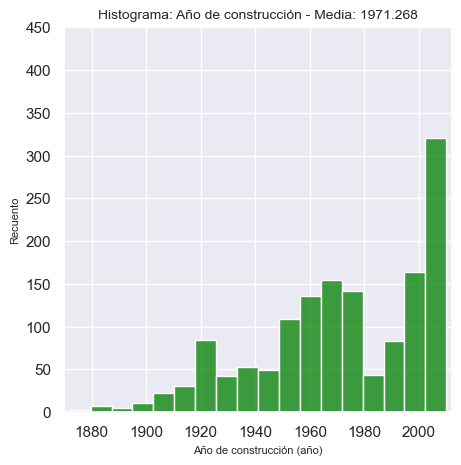

In [16]:
# Histograma de variable YearBuilt, Año de Construcción

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['YearBuilt'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Año de construcción - Media: '+str(round((stats.loc['YearBuilt']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Año de construcción (año)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(1870,2012)
plt.ylim(0,450)
print('Histograma: Año de construcción (año) (YearBuilt)')

Longitud de Calle (ft) (LotFrontage)


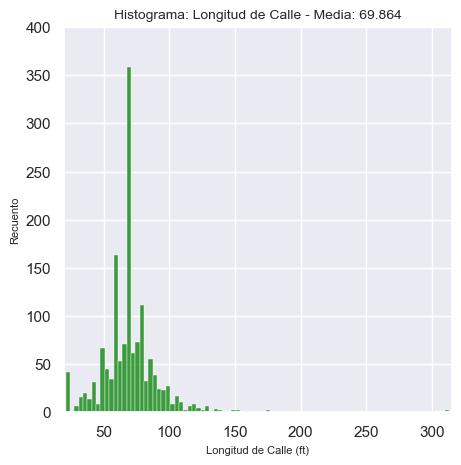

In [17]:
# Histograma de variable LotFrontage, Longitud de Calle

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.histplot(dataset_pd_fix['LotFrontage'],color='green')

# Definiendo atributos del gráfico
titulo='Histograma: Longitud de Calle - Media: '+str(round((stats.loc['LotFrontage']['Media'].item()),3))
plt.title(titulo,fontsize=10)
plt.xlabel('Longitud de Calle (ft)',fontsize=8)
plt.ylabel('Recuento', fontsize=8)
plt.xlim(20,315)
plt.ylim(0,400)
print('Longitud de Calle (ft) (LotFrontage)')

#### Parte 3.2: Correlación

Se analiza la correlación entre cada par de variables que conforman el dataset.

In [29]:
# Utilizando el DataFrame con los valores Nan corregidos (dataset_pd_fix) se calcula el coeficiente
# de correlación entre cada par de variables. La matriz resultante es:
corrm=dataset_pd_fix.corr()
corrm

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.334771
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.234812
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.413773
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.320518
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.116685
LotFrontage,0.334771,0.234812,0.413773,0.320518,0.116685,1.000000


##### Parte 3.2.1: Gráficas de Correlación

Se despligan los diagramas de dispersión para cada variable utilizando Seaborn.

Diagrama de Dispersión SalePrice y OverallQual


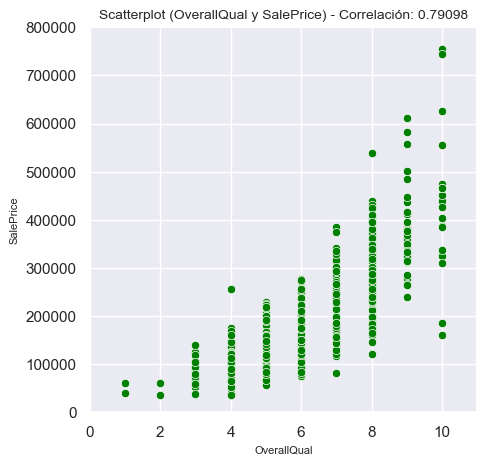

In [27]:
# Diagrama de Dispersión SalePrice y OverallQual

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.scatterplot(x=dataset_pd_fix['OverallQual'],y=dataset_pd_fix['SalePrice'],color='green',data=dataset_pd_fix)

# Definiendo atributos del gráfico
titulo='Scatterplot (OverallQual y SalePrice) - Correlación: '+str(round((corrm.loc['SalePrice']['OverallQual'].item()),5))
plt.title(titulo,fontsize=10)
plt.xlabel('OverallQual',fontsize=8)
plt.ylabel('SalePrice', fontsize=8)
plt.xlim(0,11)
plt.ylim(0,800000)
print('Diagrama de Dispersión SalePrice y OverallQual')

Diagrama de Dispersión SalePrice y 1stFlrSF


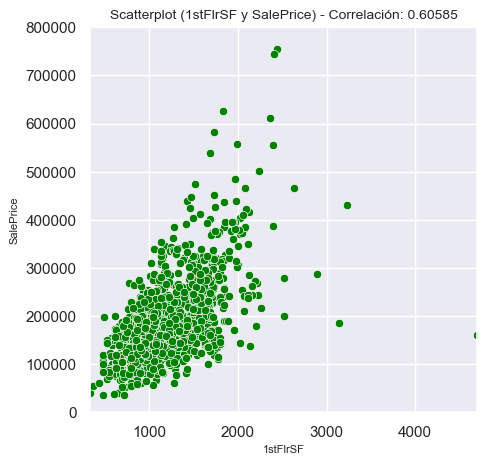

In [23]:
# Diagrama de Dispersión SalePrice y 1stFlrSF

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.scatterplot(x=dataset_pd_fix['1stFlrSF'],y=dataset_pd_fix['SalePrice'],color='green',data=dataset_pd_fix)

# Definiendo atributos del gráfico
titulo='Scatterplot (1stFlrSF y SalePrice) - Correlación: '+str(round((corrm.loc['SalePrice']['1stFlrSF'].item()),5))
plt.title(titulo,fontsize=10)
plt.xlabel('1stFlrSF',fontsize=8)
plt.ylabel('SalePrice', fontsize=8)
plt.xlim(330,4700)
plt.ylim(0,800000)
print('Diagrama de Dispersión SalePrice y 1stFlrSF')

Diagrama de Dispersión SalePrice y TotRmsAbvGrd


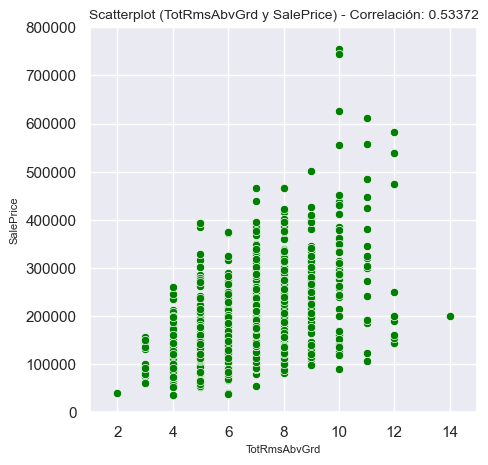

In [24]:
# Diagrama de Dispersión SalePrice y TotRmsAbvGrd

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.scatterplot(x=dataset_pd_fix['TotRmsAbvGrd'],y=dataset_pd_fix['SalePrice'],color='green',data=dataset_pd_fix)

# Definiendo atributos del gráfico
titulo='Scatterplot (TotRmsAbvGrd y SalePrice) - Correlación: '+str(round((corrm.loc['SalePrice']['TotRmsAbvGrd'].item()),5))
plt.title(titulo,fontsize=10)
plt.xlabel('TotRmsAbvGrd',fontsize=8)
plt.ylabel('SalePrice', fontsize=8)
plt.xlim(1,15)
plt.ylim(0,800000)
print('Diagrama de Dispersión SalePrice y TotRmsAbvGrd')

Diagrama de Dispersión SalePrice y YearBuilt


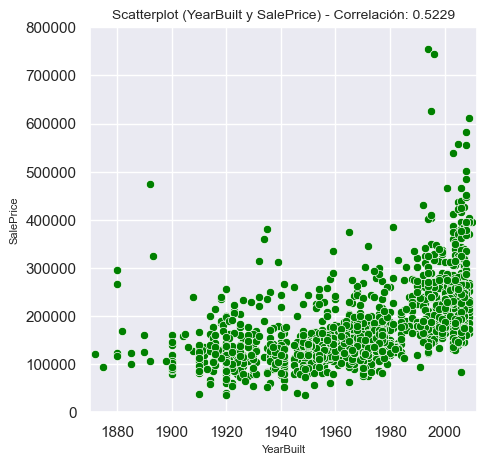

In [25]:
# Diagrama de Dispersión SalePrice y YearBuilt

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.scatterplot(x=dataset_pd_fix['YearBuilt'],y=dataset_pd_fix['SalePrice'],color='green',data=dataset_pd_fix)

# Definiendo atributos del gráfico
titulo='Scatterplot (YearBuilt y SalePrice) - Correlación: '+str(round((corrm.loc['SalePrice']['YearBuilt'].item()),5))
plt.title(titulo,fontsize=10)
plt.xlabel('YearBuilt',fontsize=8)
plt.ylabel('SalePrice', fontsize=8)
plt.xlim(1870,2012)
plt.ylim(0,800000)
print('Diagrama de Dispersión SalePrice y YearBuilt')

Diagrama de Dispersión SalePrice y LotFrontage


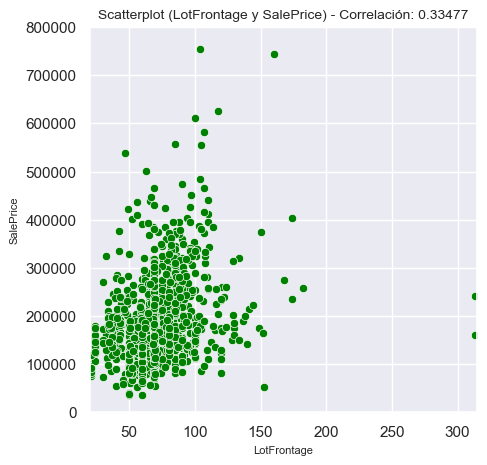

In [26]:
# Diagrama de Dispersión SalePrice y LotFrontage

# Definiendo estilo y tamaño del gráfico
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(5,5)})

# Definiendo gráfico
sns.scatterplot(x=dataset_pd_fix['LotFrontage'],y=dataset_pd_fix['SalePrice'],color='green',data=dataset_pd_fix)

# Definiendo atributos del gráfico
titulo='Scatterplot (LotFrontage y SalePrice) - Correlación: '+str(round((corrm.loc['SalePrice']['LotFrontage'].item()),5))
plt.title(titulo,fontsize=10)
plt.xlabel('LotFrontage',fontsize=8)
plt.ylabel('SalePrice', fontsize=8)
plt.xlim(20,315)
plt.ylim(0,800000)
print('Diagrama de Dispersión SalePrice y LotFrontage')

#### Parte 3.3: Conclusión

Después de realizar el análisis exploratorio y poder evaluar la correlación entre las distintas posibilidades para la variable x y la variable y (SalePrice), se determina que las dos que tienen mayor poder explicativo para un modelo de regresión líneal son:

- OverallQual (correlación 0.790982)
- 1stFlrSF (correlación 0.605852)

Así que estas dos variables serán analizadas en modelos de regresión lineal.

In [30]:
# Las dos variables con válores más altos de correlación con SalePrice se extraen de la
# matriz de correlaciones y se almacenan en un diccionario.
varselect=(corrm.iloc[1:,0].nlargest(2)).to_dict()
varselect

{'OverallQual': 0.7909816005838053, '1stFlrSF': 0.6058521846919153}

### Parte 4: Regresión Lineal

Se evaluan las dos variables seleccionadas en modelos de regresión lineal.